# Projet Data Science

## Initialisation du projet

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import time

In [11]:
dataset = pd.read_csv('../mails.csv',dtype={"content": str},low_memory=False)

In [12]:
dataset.shape

(100000, 52)

On a 100 000 mails

## Nettoyage des données

### Suppression des colonnes nulles ou non pertinentes

In [13]:
dataset.head()

,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,...,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled
0,0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),NaN,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,Phillip K Allen,Leah Van Arsdall,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),NaN,Phillip K Allen,Randall L Gay,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,Phillip K Allen,Greg Piper,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [14]:
dataset.columns

Index(['Unnamed: 0', 'Message-ID', 'Date', 'From', 'To', 'Subject', 'X-From',
       'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName',
       'content', 'user', 'Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight',
       'Cat_2_level_1', 'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1',
       'Cat_3_level_2', 'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2',
       'Cat_4_weight', 'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight',
       'Cat_6_level_1', 'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1',
       'Cat_7_level_2', 'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2',
       'Cat_8_weight', 'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight',
       'Cat_10_level_1', 'Cat_10_level_2', 'Cat_10_weight', 'Cat_11_level_1',
       'Cat_11_level_2', 'Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2',
       'Cat_12_weight', 'labeled'],
      dtype='object')

In [15]:
test = dataset[['Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight', 'Cat_2_level_1',
       'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1', 'Cat_3_level_2',
       'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2', 'Cat_4_weight',
       'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight', 'Cat_6_level_1',
       'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1', 'Cat_7_level_2',
       'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2', 'Cat_8_weight',
       'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight', 'Cat_10_level_1',
       'Cat_10_level_2', 'Cat_10_weight', 'Cat_11_level_1', 'Cat_11_level_2',
       'Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2', 'Cat_12_weight']]

In [16]:
test.isna().sum()

Cat_1_level_1      99790
Cat_1_level_2      99790
Cat_1_weight       99790
Cat_2_level_1      99800
Cat_2_level_2      99800
Cat_2_weight       99800
Cat_3_level_1      99834
Cat_3_level_2      99834
Cat_3_weight       99834
Cat_4_level_1      99896
Cat_4_level_2      99896
Cat_4_weight       99896
Cat_5_level_1      99943
Cat_5_level_2      99943
Cat_5_weight       99943
Cat_6_level_1      99979
Cat_6_level_2      99979
Cat_6_weight       99979
Cat_7_level_1      99990
Cat_7_level_2      99990
Cat_7_weight       99990
Cat_8_level_1      99998
Cat_8_level_2      99998
Cat_8_weight       99998
Cat_9_level_1      99999
Cat_9_level_2      99999
Cat_9_weight       99999
Cat_10_level_1     99999
Cat_10_level_2     99999
Cat_10_weight      99999
Cat_11_level_1    100000
Cat_11_level_2    100000
Cat_11_weight     100000
Cat_12_level_1    100000
Cat_12_level_2    100000
Cat_12_weight     100000
dtype: int64

In [17]:
dataset.drop(['Cat_1_level_1', 'Cat_1_level_2', 'Cat_1_weight', 'Cat_2_level_1',
       'Cat_2_level_2', 'Cat_2_weight', 'Cat_3_level_1', 'Cat_3_level_2',
       'Cat_3_weight', 'Cat_4_level_1', 'Cat_4_level_2', 'Cat_4_weight',
       'Cat_5_level_1', 'Cat_5_level_2', 'Cat_5_weight', 'Cat_6_level_1',
       'Cat_6_level_2', 'Cat_6_weight', 'Cat_7_level_1', 'Cat_7_level_2',
       'Cat_7_weight', 'Cat_8_level_1', 'Cat_8_level_2', 'Cat_8_weight',
       'Cat_9_level_1', 'Cat_9_level_2', 'Cat_9_weight', 'Cat_10_level_1',
       'Cat_10_level_2', 'Cat_10_weight', 'Cat_11_level_1', 'Cat_11_level_2','Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2', 'Cat_12_weight'], axis = 1, inplace = True)

In [18]:
dataset.drop(['X-From', 'X-To', 'X-FileName', 'X-FileName', 'Unnamed: 0'], axis = 1, inplace = True)

In [19]:
test[test['Cat_1_level_1'].isna()==False]

,Cat_1_level_1,Cat_1_level_2,Cat_1_weight,Cat_2_level_1,Cat_2_level_2,Cat_2_weight,Cat_3_level_1,Cat_3_level_2,Cat_3_weight,Cat_4_level_1,...,Cat_9_weight,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight
379,1.0,1.0,2.0,3.0,8.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,1.0,3.0,2.0,4.0,10.0,2.0,4.0,11.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2139,1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2232,1.0,4.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84186,1.0,1.0,2.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89217,1.0,1.0,2.0,1.0,6.0,2.0,2.0,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89301,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89920,1.0,6.0,2.0,1.0,7.0,2.0,2.0,7.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# nombre de mail ou il n'y a pas de bcc
dataset['X-bcc'].isna().sum()

99966

Au vue du nombre important de donnée nulle, on peut considérer la suppression de la colonne

### Nettoyage colonne From et To

In [21]:
#From
for i in range(len(dataset.From)):
    dataset.From[i] = str(dataset.From[i])[11:-2]

#To
for i in range(len(dataset.To)):
    dataset.To[i] = str(dataset.To[i])[11:-2]

<ipython-input-21-38aace425442>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.From[i] = str(dataset.From[i])[11:-2]
<ipython-input-21-38aace425442>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.To[i] = str(dataset.To[i])[11:-2]


### Nettoyage colonne Date

In [22]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d %H:%M:%S.%f')

## Manipulation des données

### Taille du contenu du mail

In [23]:
#Calcul de la longueur du contenu en nombre de caractère
dataset['content_size'] = dataset['content'].apply(lambda x: len(str(x)))

### Taille du sujet du mail

In [24]:
#Calcul de la longueur du sujet en nombre de caractère
dataset['subject_size'] = dataset['Subject'].apply(lambda x: 0 if 'nan' in str(x).lower() else len(str(x)))

### Mail transmit

In [25]:
#Mail transmit     
dataset['forwarded_mail'] = dataset['content'].apply(lambda x: 1 if '---------------------- forwarded by' in str(x).lower() else 0)

##### Directement transmit

In [26]:
#Mail directement transmit ou non
def mail_directement_transmit (content) :
    res = content.split()
    if ('----------------------' in res[0].lower() and 'forwarded' in res[1].lower() and 'by' in res[2].lower()):
        return 1
    else :
        return 0

#Création des colonnes dans le dataframe
dataset['mail_direct_forwarded']=0

for i in range(len(dataset)):
    dataset['mail_direct_forwarded'][i] = mail_directement_transmit(str(dataset['content'][i]))

<ipython-input-26-13187cd85297>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['mail_direct_forwarded'][i] = mail_directement_transmit(str(dataset['content'][i]))


##### Transmit avec commentaire

In [27]:
#Mail transmit avec un commentaire
def mail_transmit_avec_commentaire (content) :
    if '---------------------- forwarded by' in str(content).lower():
        msg=''
        res = content.split()
        for i in range(3):
            msg += res[i] 
        if '---------------------- forwarded by' not in msg:
            return 1
        else : 
            return 0
    else:
        return 0

dataset['mail_transmit_avec_commentaire'] =0

for i in range(len(dataset)):
    dataset['mail_transmit_avec_commentaire'][i] = mail_transmit_avec_commentaire(str(dataset['content'][i]))

<ipython-input-27-5d86b3b2430d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['mail_transmit_avec_commentaire'][i] = mail_transmit_avec_commentaire(str(dataset['content'][i]))


In [28]:
dataset[dataset['forwarded_mail']==1]

,Message-ID,Date,From,To,Subject,X-cc,X-bcc,X-Folder,X-Origin,content,user,labeled,content_size,subject_size,forwarded_mail,mail_direct_forwarded,mail_transmit_avec_commentaire
9,<30795301.1075855687494.JavaMail.evans@thyme>,2000-10-16 13:44:00,'phillip.allen@enron.com','zimam@enron.com',FW: fixed forward or other Collar floor gas pr...,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,---------------------- Forwarded by Phillip K ...,allen-p,False,2080,55,1,1,1
12,<13116875.1075855687561.JavaMail.evans@thyme>,2000-10-09 14:16:00,'phillip.allen@enron.com','keith.holst@enron.com',Consolidated positions: Issues & To Do list,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,---------------------- Forwarded by Phillip K ...,allen-p,False,5604,43,1,1,1
13,<2707340.1075855687584.JavaMail.evans@thyme>,2000-10-09 14:00:00,'phillip.allen@enron.com','keith.holst@enron.com',Consolidated positions: Issues & To Do list,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,---------------------- Forwarded by Phillip K ...,allen-p,False,5604,43,1,1,1
16,<19773657.1075855687649.JavaMail.evans@thyme>,2000-10-04 16:23:00,'phillip.allen@enron.com','ina.rangel@enron.com',"Var, Reporting and Resources Meeting",NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,---------------------- Forwarded by Phillip K ...,allen-p,False,854,36,1,1,1
18,<12759088.1075855687671.JavaMail.evans@thyme>,2000-10-03 16:30:00,'phillip.allen@enron.com','pallen70@hotmail.com',Westgate,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,---------------------- Forwarded by Phillip K ...,allen-p,False,1701,8,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,<16847489.1075840439082.JavaMail.evans@thyme>,2001-03-14 23:30:00,'daren.farmer@enron.com','aimee.lannou@enron.com',Re: deal 34342,NaN,NaN,"\ExMerge - Farmer, Darren\'Sent Mail",FARMER-D,We have a buyback under HPL (#586534). ENA had...,farmer-d,False,1880,14,1,0,1
99993,<30208772.1075854174165.JavaMail.evans@thyme>,1999-12-27 16:16:00,'daren.farmer@enron.com','carlos.rodriguez@enron.com',Unify Close Schedule,NaN,NaN,\Darren_Farmer_Dec2000\Notes Folders\'sent mail,Farmer-D,---------------------- Forwarded by Daren J Fa...,farmer-d,False,1935,20,1,1,1
99994,<6729839.1075854174187.JavaMail.evans@thyme>,1999-12-27 12:35:00,'daren.farmer@enron.com',"'pat.clynes@enron.com', 'ami.chokshi@enron.com...",displaying 4 digit year on your desktop,NaN,NaN,\Darren_Farmer_Dec2000\Notes Folders\'sent mail,Farmer-D,---------------------- Forwarded by Daren J Fa...,farmer-d,False,1320,39,1,1,1
99995,<29980890.1075854174209.JavaMail.evans@thyme>,1999-12-27 08:11:00,'daren.farmer@enron.com','carlos.rodriguez@enron.com',January Production Estimate,NaN,NaN,\Darren_Farmer_Dec2000\Notes Folders\'sent mail,Farmer-D,---------------------- Forwarded by Daren J Fa...,farmer-d,False,1367,27,1,1,1


### Nombre de cc

In [29]:
# nombre de mail ou il n'y a pas de cc
dataset['X-cc'].isna().sum()

78253

In [30]:
#Nombre de cc
def nb_cc (content):
    if str(content).lower() == 'nan':
        return 0
    else:
        return len(content.split(','))

dataset['nb_cc'] = 0

for i in range(len(dataset)):
    dataset['nb_cc'][i] = nb_cc(dataset['X-cc'][i])

<ipython-input-30-d85ff2425381>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['nb_cc'][i] = nb_cc(dataset['X-cc'][i])


### Mail automatique

In [31]:
#mail auo
mailAuto = dataset[dataset['content'].str.contains("<!--")==True]
#mailAuto = dataset[dataset['content'].str.contains("html")==True]
mailAuto['content']

1457     <HTML> <HEAD> <TITLE>Web Vixens</TITLE> <META ...
1483     <!--[core.text]--> _____________________DAVID ...
1566     <!--To put this html into an existing HTML doc...
2012     <!-- A SPECIAL OFFER brought to you by CBS Spo...
5257     <head> <title>WineISIT.com - Member E-mail</ti...
                               ...                        
94809    <! > <! > <! ATTENTION!> <! You are reading th...
94823    <!DOCTYPE -//w3c//dtd 4.0 html public transiti...
95648    <IFRAME src="http://WWW.ENERFAX.com" width=700...
96747    --------------sAAbXVADA=01 Content-type: text/...
96764    --------------sAAbXVADA=01 Content-type: text/...
Name: content, Length: 272, dtype: object

In [32]:
dataset.head()

,Message-ID,Date,From,To,Subject,X-cc,X-bcc,X-Folder,X-Origin,content,user,labeled,content_size,subject_size,forwarded_mail,mail_direct_forwarded,mail_transmit_avec_commentaire,nb_cc
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,'phillip.allen@enron.com','tim.belden@enron.com',NaN,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,Here is our forecast,allen-p,False,20,0,0,0,0,0
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,'phillip.allen@enron.com','john.lavorato@enron.com',Re:,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,Traveling to have a business meeting takes the...,allen-p,False,773,3,0,0,0,0
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,'phillip.allen@enron.com','leah.arsdall@enron.com',Re: test,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,test successful. way to go!!!,allen-p,False,29,8,0,0,0,0
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,'phillip.allen@enron.com','randall.gay@enron.com',NaN,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,"Randy, Can you send me a schedule of the salar...",allen-p,False,180,0,0,0,0,0
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,'phillip.allen@enron.com','greg.piper@enron.com',Re: Hello,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,Let's shoot for Tuesday at 11:45.,allen-p,False,33,9,0,0,0,0


### Dimension temps

##### Heure

In [33]:
dataset['Hour'] = dataset['Date'].apply(lambda x: x.hour)

##### Jour

In [34]:
dataset['Day'] = dataset['Date'].apply(lambda x: x.day)

##### Mois

In [35]:
dataset['Month'] = dataset['Date'].apply(lambda x: x.month)

##### Année

In [36]:
dataset['Year'] = dataset['Date'].apply(lambda x: x.year)

##### Moment de la journée

In [37]:
def moment_of_the_day(dataset):
    dataset["Moment"] = None
    for i in range(len(dataset.Date)):
        hour = int(dataset.Date[i].hour)
        if(hour >= 6 and hour < 12):
            dataset["Moment"][i] = "morning"
        if(hour >= 12 and hour < 18):
            dataset["Moment"][i] = "afternoon"
        if(hour >= 18 and hour < 24):
            dataset["Moment"][i] = "evening"
        if(hour >= 0 and hour < 6):
            dataset["Moment"][i] = "night"

moment_of_the_day(dataset)

<ipython-input-37-23737d490466>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Moment"][i] = "evening"
<ipython-input-37-23737d490466>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Moment"][i] = "morning"
<ipython-input-37-23737d490466>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Moment"][i] = "afternoon"
<ipython-input-37-23737d490466>:12: SettingWithCopyWarning: 
A value is trying to be set on a 

### Mail de réunion

In [38]:
def meeting (dataset):
    dataset["content"] = dataset["content"].astype(str)
    dataset["Subject"] = dataset["Subject"].astype(str)
    dataset["Meetings"] = None
    for i in range(len(dataset.content)):
        if ((dataset.content[i].lower().find("meeting") != -1) or (dataset.Subject[i].lower().find("meeting") != -1) or (dataset.content[i].lower().find("meetings") != -1) or (dataset.Subject[i].lower().find("meetings") != -1) or (dataset.Subject[i].lower().find("meeting") != -1) or (dataset.content[i].lower().find("appointment") != -1) or (dataset.Subject[i].lower().find("appointment") != -1)):
            dataset["Meetings"][i] = "True"
        else :
            dataset["Meetings"][i] = "False"
meeting(dataset)

<ipython-input-38-2294c3227bfe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Meetings"][i] = "False"
<ipython-input-38-2294c3227bfe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Meetings"][i] = "True"


### Mail important

In [39]:
def important(dataset):
    dataset["Important"] = None
    for i in range(len(dataset.content)):
        if ((dataset.content[i].lower().find("urgent") != -1) or (dataset.Subject[i].lower().find("urgent") != -1) or (dataset.content[i].lower().find("important") != -1) or (dataset.Subject[i].lower().find("important") != -1) or (dataset.content[i].lower().find("quickly") != -1) or (dataset.Subject[i].lower().find("quickly") != -1)):
            dataset["Important"][i] = "True"
        else :
            dataset["Important"][i] = "False"
important(dataset)

<ipython-input-39-7cdb0a484db8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Important"][i] = "False"
<ipython-input-39-7cdb0a484db8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Important"][i] = "True"


In [40]:
nb_important = 0
nb_meeting = 0

for i in range(len(dataset)):
    if dataset.Important[i] == "True":
        nb_important += 1
    if dataset.Meetings[i] == "True":
        nb_meeting += 1
print("Nombre de mails important : ",nb_important,"\nNombre de mails pour reunions : ",nb_meeting)

Nombre de mails important :  7918 
Nombre de mails pour reunions :  17456


In [41]:
print(dataset)

                                          Message-ID                Date  \
0      <18782981.1075855378110.JavaMail.evans@thyme> 2001-05-14 23:39:00   
1      <15464986.1075855378456.JavaMail.evans@thyme> 2001-05-04 20:51:00   
2      <24216240.1075855687451.JavaMail.evans@thyme> 2000-10-18 10:00:00   
3      <13505866.1075863688222.JavaMail.evans@thyme> 2000-10-23 13:13:00   
4      <30922949.1075863688243.JavaMail.evans@thyme> 2000-08-31 12:07:00   
...                                              ...                 ...   
99995  <29980890.1075854174209.JavaMail.evans@thyme> 1999-12-27 08:11:00   
99996   <1928351.1075854174230.JavaMail.evans@thyme> 1999-12-22 07:14:00   
99997  <29784936.1075854174252.JavaMail.evans@thyme> 1999-12-22 07:02:00   
99998  <30410887.1075854174274.JavaMail.evans@thyme> 1999-12-22 06:52:00   
99999  <14676125.1075854174296.JavaMail.evans@thyme> 1999-12-20 16:05:00   

                            From                            To  \
0      'phillip.allen

## Analyse des données

In [42]:
dataset.head()

,Message-ID,Date,From,To,Subject,X-cc,X-bcc,X-Folder,X-Origin,content,...,mail_direct_forwarded,mail_transmit_avec_commentaire,nb_cc,Hour,Day,Month,Year,Moment,Meetings,Important
0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,'phillip.allen@enron.com','tim.belden@enron.com',nan,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,Here is our forecast,...,0,0,0,23,14,5,2001,evening,False,False
1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,'phillip.allen@enron.com','john.lavorato@enron.com',Re:,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,Traveling to have a business meeting takes the...,...,0,0,0,20,4,5,2001,evening,True,False
2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,'phillip.allen@enron.com','leah.arsdall@enron.com',Re: test,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,test successful. way to go!!!,...,0,0,0,10,18,10,2000,morning,False,False
3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,'phillip.allen@enron.com','randall.gay@enron.com',nan,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,"Randy, Can you send me a schedule of the salar...",...,0,0,0,13,23,10,2000,afternoon,False,False
4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,'phillip.allen@enron.com','greg.piper@enron.com',Re: Hello,NaN,NaN,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,Let's shoot for Tuesday at 11:45.,...,0,0,0,12,31,8,2000,afternoon,False,False


anova1_1 facteur content_size et moment
le moment de la journée suivant lequel on envoit le mail influe sur la taille du mail -> afc pour voir le lien entre le moment de la journée et la taille (gros, petit, moyen)

anova1_2 facteur subject_size et moment

In [45]:
m_morning = 0
m_afternoon = 0
m_evening = 0
m_night = 0
nb_morning = 0
nb_afternoon = 0
nb_evening = 0
nb_night = 0

for i in range(len(dataset)):
    if dataset.Moment[i] == "morning":
        m_morning += 1
        nb_morning += dataset.content_size[i]
    elif dataset.Moment[i] == "afternoon":
        m_afternoon += 1
        nb_afternoon += dataset.content_size[i]
    elif dataset.Moment[i] == "evening":
        m_evening += 1
        nb_evening += dataset.content_size[i]
    elif dataset.Moment[i] == "night":
        m_night += 1
        nb_night += dataset.content_size[i]
m_morning = nb_morning/m_morning
m_afternoon = nb_afternoon/m_afternoon
m_evening = nb_evening/m_evening
m_night = nb_night/m_night
    
print("Longueur moyenne : \n Le matin : ",m_morning," \n L'apres midi : ",m_afternoon,"\n Le soir : ",m_evening,"\n La nuit : ",m_night)

Longueur moyenne : 
 Le matin :  3096.008356655761  
 L'apres midi :  1816.2202328671485 
 Le soir :  1792.5379520520114 
 La nuit :  2241.311498754005


### Etude de correlation entre content_size et Important

In [46]:
datasetCI = dataset[['content_size', 'Important']]

somme = 0
for i in range(len(datasetCI)):
    somme += datasetCI.content_size[i]
moyenne = somme/len(datasetCI)

print("Taille moyenne d'un mail :",moyenne)

somme = 0
print(len(datasetCI))
for i in range(len(datasetCI)):
    if(datasetCI.content_size[i] > moyenne+moyenne/2):
        somme += 1
        datasetCI = datasetCI.drop(i)
print("On supprime les grands extremes du nombre de : ",somme)


Taille moyenne d'un mail : 2158.9431
100000
On supprime les grands extremes du nombre de :  13758


# Visualisation des données après nettoyage

#### Nombre de mail sur l'année

In [53]:
from collections import Counter

dates = []

for num in range(len(dataset)):
    dates.append(dataset['Date'][num])

dates_count = Counter(dates)

df = pd.DataFrame.from_dict(dates_count, orient='index').reset_index()
df.columns = ['datetime','count']

df['date']=df['datetime'].map(lambda x : x.date())

pivot = df.pivot_table(index='date', values='count', aggfunc='sum').reset_index()
pivot = pivot[(pivot['date']>pd.datetime(2000,1,1).date()) & (pivot['date'] < pd.datetime(2002,6,30).date())]
pivot['date'] = pd.to_datetime(pivot['date'])

import altair as alt

alt.Chart(pivot).mark_bar().encode(
    x='date',
    y='count',
    tooltip=['date','count'],
).properties(width=800)

<ipython-input-53-33af55063443>:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pivot = pivot[(pivot['date']>pd.datetime(2000,1,1).date()) & (pivot['date'] < pd.datetime(2002,6,30).date())]


alt.Chart(...)

#### Répartition des mails sur la journée

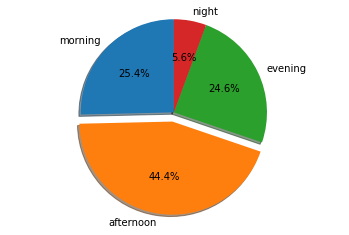

In [54]:
data = [0,0,0,0]
for i in range(len(dataset)):
    moment = dataset.Moment[i]
    if(moment == "morning"):
        data[0] += 1
    elif(moment == "afternoon"):
        data[1] += 1
    elif(moment == "evening"):
        data[2] += 1
    elif(moment == "night"):
        data[3] += 1

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'morning', 'afternoon', 'evening', 'night'
sizes = [data[0], data[1], data[2], data[3]]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Proportions des mails internes et externes à l'entreprise

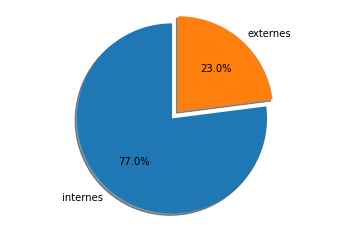

In [55]:
internes = len(dataset[dataset["To"].str.contains("@enron.com")==True])
externes = len(dataset[dataset["To"].str.contains("@enron.com")==False])

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = "internes", "externes"
sizes = [internes, externes]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Proportions des mails identifiés

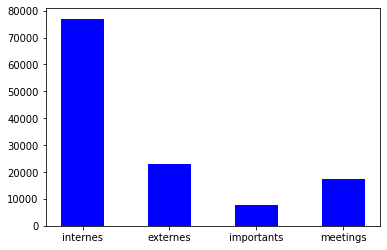

In [56]:
internes = len(dataset[dataset["To"].str.contains("@enron.com")==True])
externes = len(dataset[dataset["To"].str.contains("@enron.com")==False])
importants = len(dataset[dataset["Important"].str.contains("True")==True])
meetings = len(dataset[dataset["Meetings"].str.contains("True")==True])

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

x = ["internes", "externes", "importants", "meetings"]
height = [internes, externes, importants, meetings]
width = 0.5

plt.bar(x, height, width, color='b')

plt.savefig('proportionsMailsIdentifiés.png')
plt.show()

#### Top mail senders

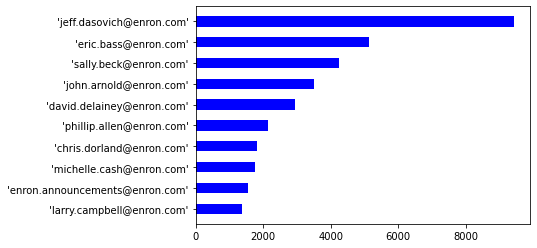

In [57]:
dic = {}
for i in range(len(dataset)):
    currentFrom = dataset.From[i]
    if(currentFrom in dic):
        dic[currentFrom] += 1
    else:
        dic[currentFrom] = 1

keys = [k for k, v in dic.items() if v < 1200]
for x in keys:
    del dic[x]

sortedDic = sorted(dic.items(), key=lambda x: x[1], reverse=False)
dic = {}
for i in sortedDic:
    dic[i[0]] = i[1]

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

x = list(dic.keys())
height = list(dic.values())
width = 0.5

plt.barh(x, height, width, color='b')


plt.savefig('proportionsMailsPerPerson.png')
plt.show()